In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
folder_path = os.path.join(os.getcwd(), "time data")
csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]

dataframes = {file: pd.read_csv(os.path.join(folder_path, file)) for file in csv_files}

for file, df in dataframes.items():
    print(f"\n--- First 5 rows of {file} ---")
    print(df.head())


--- First 5 rows of Real_Estate_(Residential_Details).csv ---
   RecordID_Int ParcelNumber StreetNumber   StreetName Unit  \
0             1    010001600          600    MASSIE RD  NaN   
1             2    010005000         2030  BARRACKS RD  NaN   
2             3    010006000         2028  BARRACKS RD  NaN   
3             4    010007000         1930  BARRACKS RD  NaN   
4             5    010008000         1924  BARRACKS RD  NaN   

                       UseCode            Style Grade                    Roof  \
0  Multipurpose Bldg (College)          2 Story     A                   Metal   
1                  Vacant Land              NaN   NaN                     NaN   
2                Single Family          2 Story     A  Architectural Shingles   
3                Single Family  2 Sty Excellent   A -                   Slate   
4                  Vacant Land              NaN   NaN                     NaN   

   Flooring  ... Bedrooms HalfBathrooms  FullBathrooms BasementGarage  

In [5]:
merged_df = None

for file, df in dataframes.items():
    if merged_df is None:
        merged_df = df
    else:
        merged_df = merged_df.merge(df, on="ParcelNumber", how="inner")  # Inner join


merged_df.to_csv("merged_data.csv", index=False)
merged_df.head()

,RecordID_Int_x,ParcelNumber,StreetNumber_x,StreetName_x,Unit_x,UseCode,Style,Grade,Roof,Flooring,...,StreetNumber,StreetName,Unit,StateCode,TaxType,Zone,TaxDist,Legal,Acreage,GPIN
0,1,010001600,600,MASSIE RD,NaN,Multipurpose Bldg (College),2 Story,A,Metal,None,...,600,MASSIE RD,NaN,7.6 Exempt Educational,Exempt,CM,NaN,80 AC JAG SCHOOL,80.72,1056
1,2,010005000,2030,BARRACKS RD,NaN,Vacant Land,NaN,NaN,NaN,NaN,...,2030,BARRACKS RD,NaN,1.0 Residential (Urban),Taxable,R-B,NaN,LOT 11 BK 10 RUGBY,0.83,1492
2,2,010005000,2030,BARRACKS RD,NaN,Vacant Land,NaN,NaN,NaN,NaN,...,2030,BARRACKS RD,NaN,1.0 Residential (Urban),Taxable,R-B,NaN,LOT 11 BK 10 RUGBY,0.83,1492
3,2,010005000,2030,BARRACKS RD,NaN,Vacant Land,NaN,NaN,NaN,NaN,...,2030,BARRACKS RD,NaN,1.0 Residential (Urban),Taxable,R-B,NaN,LOT 11 BK 10 RUGBY,0.83,1492
4,3,010006000,2028,BARRACKS RD,NaN,Single Family,2 Story,A,Architectural Shingles,Hardwood,...,2028,BARRACKS RD,NaN,1.0 Residential (Urban),Taxable,R-B,NaN,LOTS 9 & 10 BK 10 RUGBY,1.89,1511


In [6]:
merged_df.columns.tolist()

['RecordID_Int_x',
 'ParcelNumber',
 'StreetNumber_x',
 'StreetName_x',
 'Unit_x',
 'UseCode',
 'Style',
 'Grade',
 'Roof',
 'Flooring',
 'Heating',
 'Fireplace',
 'YearBuilt',
 'TotalRooms',
 'Bedrooms',
 'HalfBathrooms',
 'FullBathrooms',
 'BasementGarage',
 'Basement',
 'FinishedBasement',
 'BasementType',
 'ExternalWalls',
 'NumberOfStories',
 'SquareFootageFinishedLiving',
 'RecordID_Int_y',
 'SaleDate',
 'SaleAmount',
 'StreetName_y',
 'StreetNumber_y',
 'Unit_y',
 'BookPage',
 'RecordID_Int',
 'StreetNumber',
 'StreetName',
 'Unit',
 'StateCode',
 'TaxType',
 'Zone',
 'TaxDist',
 'Legal',
 'Acreage',
 'GPIN']

In [7]:
columns_to_keep = ['ParcelNumber','SaleAmount', 'SaleDate','Bedrooms','YearBuilt','SquareFootageFinishedLiving', 'Grade']
merged_df = merged_df[[col for col in columns_to_keep if col in merged_df.columns]]
merged_df.head()

,ParcelNumber,SaleAmount,SaleDate,Bedrooms,YearBuilt,SquareFootageFinishedLiving,Grade
0,010001600,0,1900/01/01 05:00:00+00,4,1920.0,3672.0,A
1,010005000,581500,2024/06/28 04:00:00+00,NaN,NaN,NaN,NaN
2,010005000,0,1993/02/18 05:00:00+00,NaN,NaN,NaN,NaN
3,010005000,0,1993/02/18 05:00:00+00,NaN,NaN,NaN,NaN
4,010006000,1305000,2023/12/15 05:00:00+00,5,1940.0,2786.0,A


In [8]:
merged_df = merged_df.dropna()
merged_df_clean = merged_df[merged_df["SaleAmount"] != 0]
merged_df_clean.to_csv("merged_data_clean.csv", index=False)
merged_df_clean = merged_df_clean[merged_df_clean.apply(lambda row: 'No dat' not in row.values, axis=1)]
merged_df_clean = merged_df_clean[merged_df_clean['Bedrooms'] != '2215']
merged_df_clean['Bedrooms'] = pd.to_numeric(merged_df_clean['Bedrooms'], errors='coerce').astype('Int64')
merged_df_clean = merged_df_clean[merged_df_clean['YearBuilt'] >= 1950]
merged_df_clean = merged_df_clean[merged_df_clean['YearBuilt'] <= 2025]
merged_df_clean['SaleDateYr'] = pd.to_datetime(merged_df_clean['SaleDate'])
merged_df_clean['SaleDateYr'] = merged_df_clean['SaleDateYr'].dt.year
grade_mapping = {
    "A++": 10, "A +": 9, "A": 8.5, "A -": 8,
    "B++": 7.5, "B +": 7, "B": 6.5, "B -": 6,
    "C++": 5.5, "C +": 5, "C": 4.5, "C -": 4,
    "D +": 3.5, "D": 3, "D -": 2.5, "E": 2
}
merged_df_clean['Grade out of 10'] = merged_df_clean['Grade'].map(grade_mapping)
merged_df_clean.to_csv("cleaned_housing.csv", index=False)
merged_df_clean.head()

,ParcelNumber,SaleAmount,SaleDate,Bedrooms,YearBuilt,SquareFootageFinishedLiving,Grade,SaleDateYr,Grade out of 10
14,010010000,575000,2018/10/31 04:00:00+00,4,1950.0,2144.0,B++,2018,7.5
15,010011000,205000,1984/05/16 04:00:00+00,6,1954.0,3392.0,B +,1984,7.0
16,010011000,970000,2018/01/10 05:00:00+00,6,1954.0,3392.0,B +,2018,7.0
17,010012000,785000,2020/06/26 04:00:00+00,3,1952.0,2520.0,B++,2020,7.5
18,010012000,512000,2015/05/04 04:00:00+00,3,1952.0,2520.0,B++,2015,7.5


In [9]:
merged_df_clean["SaleAmount"] = merged_df_clean["SaleAmount"].dropna()

In [10]:
merged_df_clean['Bedrooms'].unique()

<IntegerArray>
[4, 6, 3, 2, 7, 5, 1, 8, 10, 0, 12, 9]
Length: 12, dtype: Int64

In [11]:
merged_df_clean['Grade'].unique()

array(['B++', 'B +', 'A -', 'A', 'C', 'B', 'B -', 'C++', 'C +', 'A +',
       'D', 'C -', 'A++', 'D +', 'D -', 'E'], dtype=object)

In [12]:
merged_df_clean['Grade out of 10'].unique()

array([ 7.5,  7. ,  8. ,  8.5,  4.5,  6.5,  6. ,  5.5,  5. ,  9. ,  3. ,
        4. , 10. ,  3.5,  2.5,  2. ])

In [13]:
merged_df_clean['YearBuilt'].unique()

array([1950., 1954., 1952., 1958., 2002., 1951., 1970., 1953., 2005.,
       1956., 1957., 1955., 1979., 2014., 1990., 1971., 1969., 1964.,
       2000., 1960., 1980., 1959., 1981., 1968., 2010., 1975., 1973.,
       1967., 2023., 2006., 1994., 1997., 1998., 1999., 2001., 2004.,
       1963., 2013., 2015., 2011., 2021., 1962., 1966., 1961., 1976.,
       1987., 1972., 1992., 1983., 1991., 2016., 1993., 2007., 1984.,
       1965., 2022., 1986., 2012., 2017., 1978., 2019., 2009., 1996.,
       2008., 1985., 2018., 1989., 1977., 1982., 2020., 1995., 1974.,
       2003., 1988., 2024.])

In [14]:
merged_df_clean['SaleDateYr'].unique()

array([2018, 1984, 2020, 2015, 1973, 2002, 1996, 1958, 2017, 2000, 1993,
       2005, 2008, 2003, 2001, 2006, 2023, 2010, 2022, 1994, 1989, 1991,
       2019, 1999, 2004, 2014, 2007, 1995, 2012, 2021, 1997, 1985, 2013,
       1979, 1992, 1976, 2016, 1971, 1952, 2024, 2011, 2009, 1983, 1988,
       1998, 1986, 1977, 1980, 1972, 1970, 1987, 1990, 1978, 1951, 1953,
       1982, 1974, 1975, 1969, 1963, 1954, 1965, 1957, 1961, 1981, 1968,
       1967, 1962, 1966, 1964, 1956, 1955, 1960, 1946, 1959, 1950, 1947,
       1949, 1909, 1945, 1944, 1948])

In [15]:
#get average CPI value per year
df_CPI = pd.read_csv("CPI.csv")
print(df_CPI.head())

# Convert 'DATE' to datetime format and extract the year (SaleDate)
df_CPI['DATE'] = pd.to_datetime(df_CPI["DATE"])
df_CPI["SaleDateYr"] = df_CPI["DATE"].dt.year
# Extract two-digit year
df_CPI["Year_2digit"] = df_CPI["DATE"].dt.year % 100  # Get last two digits

# Convert to full year
df_CPI["SaleDateYr"] = df_CPI["Year_2digit"].apply(lambda x: 1900 + x if x >= 47 else 2000 + x)

# Drop the temporary two-digit year column
df_CPI.drop(columns=["Year_2digit"], inplace=True)

# Compute the average CPI per year
average_cpi_per_sale_date = df_CPI.groupby("SaleDateYr")["CPI"].mean().reset_index()

# Merge the yearly average CPI back into the original DataFrame
df_CPI = df_CPI.merge(average_cpi_per_sale_date, on="SaleDateYr", suffixes=("", "_Avg"))

print(df_CPI)
df_CPI_clean = df_CPI.drop(columns=['CPI', 'DATE'])
print(df_CPI_clean)

     DATE    CPI
0  1/1/47  21.48
1  2/1/47  21.62
2  3/1/47  22.00
3  4/1/47  22.00
4  5/1/47  21.95
          DATE      CPI  SaleDateYr     CPI_Avg
0   2047-01-01   21.480        1947   22.331667
1   2047-02-01   21.620        1947   22.331667
2   2047-03-01   22.000        1947   22.331667
3   2047-04-01   22.000        1947   22.331667
4   2047-05-01   21.950        1947   22.331667
..         ...      ...         ...         ...
933 2024-10-01  315.564        2024  313.697833
934 2024-11-01  316.449        2024  313.697833
935 2024-12-01  317.603        2024  313.697833
936 2025-01-01  319.086        2025  319.430500
937 2025-02-01  319.775        2025  319.430500

[938 rows x 4 columns]
     SaleDateYr     CPI_Avg
0          1947   22.331667
1          1947   22.331667
2          1947   22.331667
3          1947   22.331667
4          1947   22.331667
..          ...         ...
933        2024  313.697833
934        2024  313.697833
935        2024  313.697833
936        2025  3

In [16]:
#add the CPI values of each year (sale date) into the big DF on the Sale Date column
merged_df_clean = merged_df_clean.merge(df_CPI_clean, on="SaleDateYr", how="left")
print(merged_df_clean)

#get the CPI for 2024 year
cpi_2024 = average_cpi_per_sale_date[average_cpi_per_sale_date["SaleDateYr"] == 2024]["CPI"].values[0]
merged_df_clean["SaleAmount_2024"] = merged_df_clean["SaleAmount"] * (cpi_2024 / merged_df_clean["CPI_Avg"])

       ParcelNumber  SaleAmount                SaleDate  Bedrooms  YearBuilt  \
0         010010000      575000  2018/10/31 04:00:00+00         4     1950.0   
1         010010000      575000  2018/10/31 04:00:00+00         4     1950.0   
2         010010000      575000  2018/10/31 04:00:00+00         4     1950.0   
3         010010000      575000  2018/10/31 04:00:00+00         4     1950.0   
4         010010000      575000  2018/10/31 04:00:00+00         4     1950.0   
...             ...         ...                     ...       ...        ...   
302750    610318000       93000  1999/02/18 05:00:00+00         3     1999.0   
302751    610318000       93000  1999/02/18 05:00:00+00         3     1999.0   
302752    610318000       93000  1999/02/18 05:00:00+00         3     1999.0   
302753    610318000       93000  1999/02/18 05:00:00+00         3     1999.0   
302754    610318000       93000  1999/02/18 05:00:00+00         3     1999.0   

        SquareFootageFinishedLiving Gra

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [18]:
merged_df_clean = merged_df_clean.dropna(subset=["SaleAmount_2024"])
merged_df_clean['SaleAmount_2024'] = merged_df_clean['SaleAmount_2024'].astype(int)
#drop NaN columns

print(merged_df_clean)

       ParcelNumber  SaleAmount                SaleDate  Bedrooms  YearBuilt  \
0         010010000      575000  2018/10/31 04:00:00+00         4     1950.0   
1         010010000      575000  2018/10/31 04:00:00+00         4     1950.0   
2         010010000      575000  2018/10/31 04:00:00+00         4     1950.0   
3         010010000      575000  2018/10/31 04:00:00+00         4     1950.0   
4         010010000      575000  2018/10/31 04:00:00+00         4     1950.0   
...             ...         ...                     ...       ...        ...   
302750    610318000       93000  1999/02/18 05:00:00+00         3     1999.0   
302751    610318000       93000  1999/02/18 05:00:00+00         3     1999.0   
302752    610318000       93000  1999/02/18 05:00:00+00         3     1999.0   
302753    610318000       93000  1999/02/18 05:00:00+00         3     1999.0   
302754    610318000       93000  1999/02/18 05:00:00+00         3     1999.0   

        SquareFootageFinishedLiving Gra

/var/folders/fy/v6kzwxrx1r70zp5tvyccmtkh0000gn/T/ipykernel_55591/1768114678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_clean['SaleAmount_2024'] = merged_df_clean['SaleAmount_2024'].astype(int)


In [19]:
# Count duplicates based on columns 'A' and 'B'
print(merged_df_clean['SaleAmount'].isnull().sum())
duplicates = merged_df_clean.duplicated(subset=['SaleAmount', 'ParcelNumber'], keep=False)  # Keep=False marks all duplicates
df_duplicates = merged_df_clean[duplicates]
print(df_duplicates) #list of duplicates
merged_df_clean = merged_df_clean.drop_duplicates(subset=['SaleAmount', 'ParcelNumber'], keep='first')
print(merged_df_clean)

0
       ParcelNumber  SaleAmount                SaleDate  Bedrooms  YearBuilt  \
0         010010000      575000  2018/10/31 04:00:00+00         4     1950.0   
1         010010000      575000  2018/10/31 04:00:00+00         4     1950.0   
2         010010000      575000  2018/10/31 04:00:00+00         4     1950.0   
3         010010000      575000  2018/10/31 04:00:00+00         4     1950.0   
4         010010000      575000  2018/10/31 04:00:00+00         4     1950.0   
...             ...         ...                     ...       ...        ...   
302750    610318000       93000  1999/02/18 05:00:00+00         3     1999.0   
302751    610318000       93000  1999/02/18 05:00:00+00         3     1999.0   
302752    610318000       93000  1999/02/18 05:00:00+00         3     1999.0   
302753    610318000       93000  1999/02/18 05:00:00+00         3     1999.0   
302754    610318000       93000  1999/02/18 05:00:00+00         3     1999.0   

        SquareFootageFinishedLiving G

In [20]:
sorted_values = merged_df_clean['SaleAmount_2024'].sort_values().tolist()
print(sorted_values)

[1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 17, 155, 166, 170, 199, 265, 309, 329, 329, 329, 332, 447, 447, 460, 467, 486, 486, 531, 582, 750, 885, 901, 962, 1038, 1046, 1057, 1058, 1165, 1279, 1307, 1457, 1608, 1660, 1704, 1883, 2092, 2116, 2250, 2281, 2375, 2607, 2682, 3147, 3515, 3601, 3864, 3979, 4080, 4101, 4321, 4471, 4682, 4707, 4723, 4831, 4833, 4997, 4999, 5053, 5111, 5120, 5174, 5184, 5191, 5268, 5424, 5434, 5522, 5599, 5649, 5796, 5830, 5831, 5831, 5853, 5859, 5870, 6002, 6133, 6221, 6382, 6456, 6517, 6535, 6922, 7031, 7040, 7084, 7313, 7686, 7697, 7762, 7762, 7877, 7934, 8071, 8075, 8114, 8192, 8203, 8234, 8283, 8295, 8392, 8449, 8496, 8551, 8643, 8643, 8643, 8659, 8689, 8720, 8720, 8720, 8858, 8954, 9135, 9222, 9341, 9446, 9660, 9770, 9770, 9833, 9961, 10000, 10019, 10042, 10060, 10240, 10349, 10499, 10536, 10603, 10627, 10627, 10627, 10631, 10631, 10659, 10761, 10813, 10861, 10869, 10887, 10894, 11109, 11133, 1

In [21]:
#remove all rows where saleamount is less than 1000
merged_df_clean = merged_df_clean[merged_df_clean['SaleAmount_2024'] >= 1000]


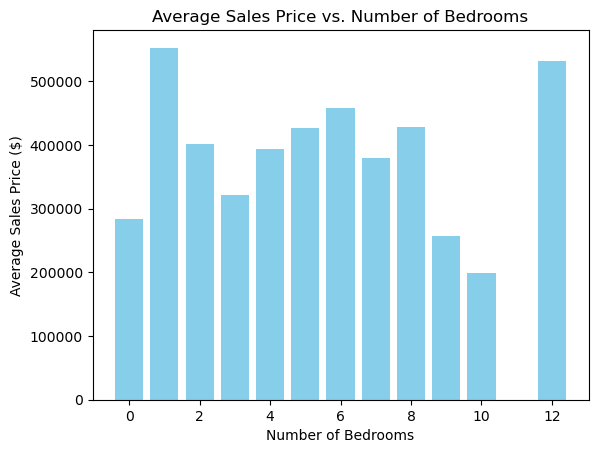

In [22]:
avg_prices = merged_df_clean.groupby('Bedrooms')['SaleAmount_2024'].mean()

# Create bar chart
plt.bar(avg_prices.index, avg_prices.values, color='skyblue')

# Add labels and title
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Sales Price ($)')
plt.title('Average Sales Price vs. Number of Bedrooms')

# Show the chart
plt.show()

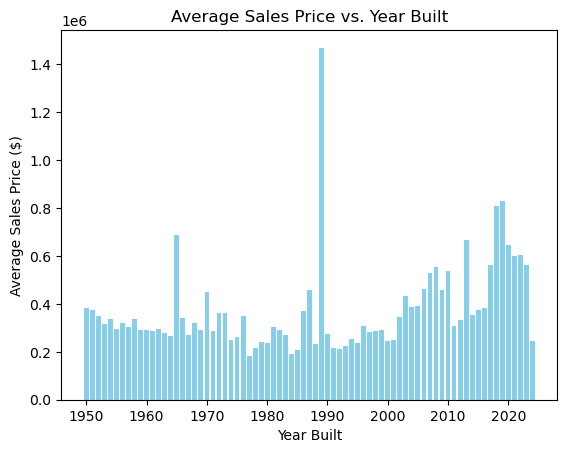

In [23]:
avg_prices = merged_df_clean.groupby('YearBuilt')['SaleAmount_2024'].mean()

# Create bar chart
plt.bar(avg_prices.index, avg_prices.values, color='skyblue')

# Add labels and title
plt.xlabel('Year Built')
plt.ylabel('Average Sales Price ($)')
plt.title('Average Sales Price vs. Year Built')

# Show the chart
plt.show()

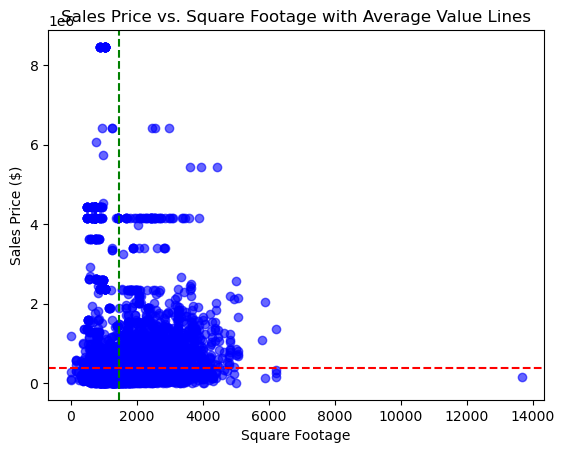

In [24]:
x = merged_df_clean['SquareFootageFinishedLiving']
y = merged_df_clean['SaleAmount_2024']

plt.scatter(x, y, color='blue', alpha=0.6)

x_avg = np.mean(x)
y_avg = np.mean(y)

plt.axhline(y_avg, color='red', linestyle='--', label=f'Avg Y: {y_avg:.2f}')

# Optionally, add a vertical line at the average x-value
plt.axvline(x_avg, color='green', linestyle='--', label=f'Avg X: {x_avg:.2f}')

# Add labels and title
plt.xlabel('Square Footage')
plt.ylabel('Sales Price ($)')
plt.title('Sales Price vs. Square Footage with Average Value Lines')

# Show the plot
plt.show()

In [25]:
merged_df_clean.loc[:,['SaleDateYr', 'SaleAmount_2024']].groupby(['SaleDateYr']).describe()

SaleAmount_2024                                                  \
                     count          mean           std      min        25%   
SaleDateYr                                                                   
1947                   1.0  9.833000e+03           NaN   9833.0    9833.00   
1948                   1.0  5.870000e+03           NaN   5870.0    5870.00   
1949                   3.0  3.348700e+04  4.520214e+04   5599.0    7410.50   
1950                  13.0  6.586031e+04  5.367833e+04   2281.0   17599.00   
1951                  27.0  7.777756e+04  7.705466e+04   4831.0   17814.00   
...                    ...           ...           ...      ...        ...   
2020                 589.0  4.864292e+05  3.039346e+05  42415.0  302965.00   
2021                 684.0  4.914047e+05  2.909694e+05  23153.0  310261.00   
2022                 639.0  1.081857e+06  1.802929e+06   1608.0  340309.50   
2023                 390.0  5.382874e+05  4.265920e+05  15442.0  319614.75   
2024                 399.0  6.432130e+05  5.010031e+05  10000.0  381500.00   

                                            
                 50%        75%        max  
SaleDateYr                                  
1947          9833.0    9833.00     9833.0  
1948          5870.0    5870.00     5870.0  
1949          9222.0   47431.00    85640.0  
1950         78220.0   97775.00   156441.0  
1951         79108.0   99942.50   301942.0  
...              ...        ...        ...  
2020        437482.0  586779.00  2908472.0  
2021        434135.0  572044.75  2431156.0  
2022        456676.0  695735.00  8463428.0  
2023        437544.0  617709.00  6074144.0  
2024        495000.0  700000.00  2600000.0  

[78 rows x 8 columns]

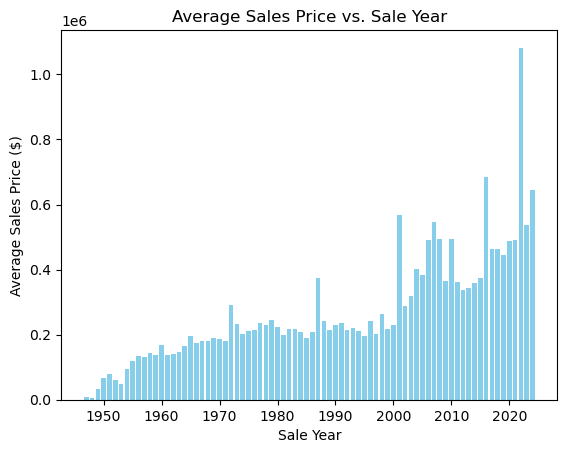

In [26]:
avg_prices = merged_df_clean.groupby('SaleDateYr')['SaleAmount_2024'].mean()

# Create bar chart
plt.bar(avg_prices.index, avg_prices.values, color='skyblue')

# Add labels and title
plt.xlabel('Sale Year')
plt.ylabel('Average Sales Price ($)')
plt.title('Average Sales Price vs. Sale Year')

# Show the chart
plt.show()

In [27]:
from sklearn import tree
columns_to_keep1 = ['SaleAmount_2024', 'SaleDateYr','Bedrooms','YearBuilt','SquareFootageFinishedLiving', 'Grade out of 10']
reg_df = merged_df_clean[[col for col in columns_to_keep1 if col in merged_df_clean.columns]]

reg_df.head()

,SaleAmount_2024,SaleDateYr,Bedrooms,YearBuilt,SquareFootageFinishedLiving,Grade out of 10
0,718345,2018,4,1950.0,2144.0,7.5
12,618743,1984,6,1954.0,3392.0,7.0
24,1211818,2018,6,1954.0,3392.0,7.0
36,951312,2020,3,1952.0,2520.0,7.5
48,677688,2015,3,1952.0,2520.0,7.5


In [28]:
from sklearn.model_selection import train_test_split

def quick_tree(df,depth=5):
    # Resample and Process data:
    df_t = reg_df.sample(n=df.shape[0],replace=True)
    y = df_t['SaleAmount_2024']
    X = df_t.drop(['SaleAmount_2024'], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
    # Fit decision tree:
    cart = tree.DecisionTreeRegressor(max_depth=depth) # Create a classifier object
    cart = cart.fit(X_train, y_train) # Fit the classifier
    # Visualize results:
    tree.plot_tree(cart,feature_names=X_train.columns.to_list(),filled=True)
    # Rsq:
    y_hat = cart.predict(X_test)
    SSE = np.sum( (y_test-y_hat)**2 )
    TSS = np.sum( (y_test-y_test.mean())**2 )
    Rsq = 1 - SSE/TSS
    print(Rsq)

0.2606242803605834


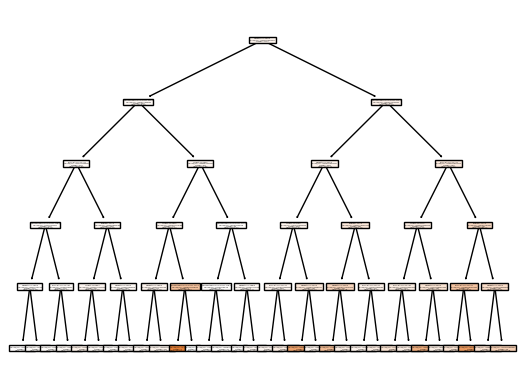

In [29]:
quick_tree(reg_df)

In [30]:
# Split data into training rows and testing rows:
N = reg_df.shape[0]
reg_df = reg_df.sample(frac=1, random_state=100) # randomize the order in which data appears
train_size = int(.8*N)
df_train = reg_df[0:train_size]
N_train = df_train.shape[0]
df_test = reg_df[train_size:]
N_test = df_test.shape[0]

# Bootstrap:
T = 1000
m_depth = 5
Rsq = np.zeros(T) # preallocate the rsq measure
y_test_hat = np.zeros([T,N_test]) # preallocate predictions on test set
df_train.head()

# Split data into train/test:
X_train = df_train.drop(['SaleAmount_2024'],axis=1)
y_train = df_train['SaleAmount_2024']
X_test = df_test.drop(['SaleAmount_2024'],axis=1)
y_test = df_test['SaleAmount_2024']

# Bootstrapping:
for s in range(T):
    # Generate a bootstrap sample:
    df_s = df_train.sample(frac=1, replace=True)
    X_s = df_s.drop('SaleAmount_2024',axis=1)
    y_s = df_s['SaleAmount_2024']
    # Fit decision tree:
    cart = tree.DecisionTreeRegressor(max_depth=m_depth) # Create a classifier object
    cart = cart.fit(X_s, y_s) # Fit the classifier
    # Compute Rsq:
    y_hat = cart.predict(X_test)
    SSE = np.sum( (y_test-y_hat)**2 )
    TSS = np.sum( (y_test-y_s.mean())**2 )
    Rsq[s] = 1 - SSE/TSS
    # Make and Save Predictions:
    y_test_hat[s,:] = y_hat

# Ensemble predictor:
y_hat_ensemble = y_test_hat.mean(axis=0) # Average the columns to get the ensemble prediction
SSE = np.sum( (y_test-y_hat_ensemble)**2 )
TSS = np.sum( (y_test-y_train.mean())**2 )
Rsq_ensemble = 1 - SSE/TSS

print(Rsq_ensemble)

0.35602093098122534


In [31]:
from sklearn.ensemble import RandomForestRegressor

# Fit model:
model = RandomForestRegressor() # Build a random forest model
rf = model.fit(X_train,y_train) # Fit the rf model

# Make predictions:
y_hat_rf = rf.predict(X_test) # Model predictions

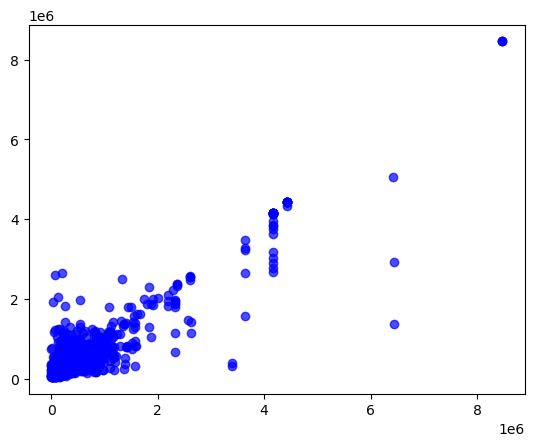

In [32]:
plt.scatter(y_test, y_hat_rf, color="blue", alpha=0.7) # Predicted v Actual

In [33]:
rf.score(X_test,y_test) # Rsq measure

0.8240977091662638

Text(0, 0.5, 'Mean decrease in impurity')

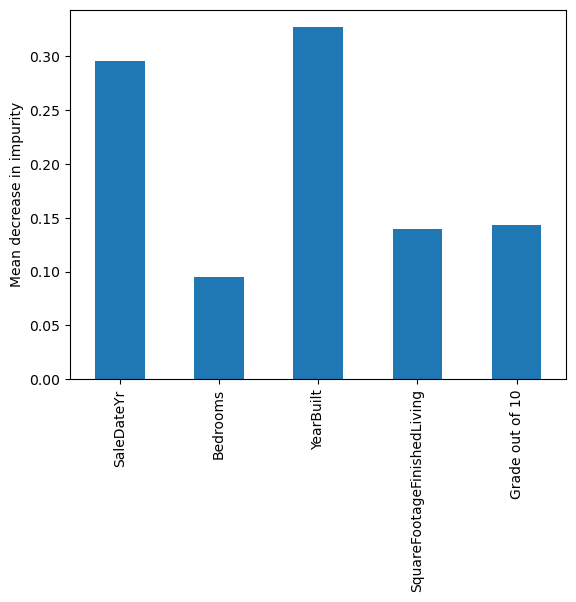

In [34]:
# Variable importance plot:
forest_importances = pd.Series(rf.feature_importances_, index=X_train.columns )
forest_importances.plot.bar()
plt.ylabel("Mean decrease in impurity")